---
# **Rekomendasi produk bundling dgn metode asosiasi untuk optimalisasi penjualan**
> Seaborn Skipy
---


---
# 1. Business Understanding
> Sebuah toko roti yang berlokasi di Edinburgh adalah sebuah toko yang tidak hanya menjual roti atau makanan saja namun juga menjual berbagai minuman dan lain-lain. Pemilik toko roti mencoba ingin meningkatkan penjualan produk mereka dengan memanfaatkan strategi bundling. Mereka ingin menggabungkan beberapa produk roti, minuman, dan barang lainnya untuk menarik pelanggan dan meningkatkan penjualan secara keseluruhan. Namun, tantangan yang mereka hadapi adalah optimisasi stok; mereka harus memastikan bahwa kombinasi produk yang dibundel ini tidak hanya menarik bagi pelanggan tetapi juga mempertimbangkan ketersediaan stok yang mereka miliki. Selain itu, mereka perlu menata rak toko dengan cerdas, menempatkan produk-produk yang terkait atau memiliki hubungan erat di dekat satu sama lain untuk mempermudah pembelian oleh pelanggan. Bagaimana cara mereka mengatur dan memilih produk yang tepat untuk dibundel, sambil mempertimbangkan stok yang tersedia dan penyusunan rak toko yang efektif?

Dataset ini berisi history penjualan selama kurang lebih 7 bulan. Dari dataset ini, kami mau membantu Toko Roti tersebut untuk memaksimalkan penjualan roti dan beranekaragam makanan mereka dengan cara mengeskplorasi dataset hingga melakukan Market Basket Analysis. Maka dari itu, rumusan masalah yang diajukan adalah:

Di saat waktu apa kah terjadi jumlah transaksi maksimum?
Produk apa saja yang sering dibeli customers secara bersamaan?

Problem : Asosiasi

Algoritma : Apriori & FP-Growth - Unsupervised Learning

---


---
# Goals
> Tujuan dari project ini adalah untuk menentukan produk bundling, optimalisasi stock untuk produk yang sering dibeli bersamaan, penyusunan rak berdasarkan produk yang memiliki hubungan.


---

---
# Solusi yang kami tawarkan
> Adapun solusi yang dapat ditawarkan adalah sebagai berikut:
1. Dengan menerapkan aturan Asosiasi menggunakan metode Apriori dan FP Growth, kita berhasil mengidentifikasi pola-pola hubungan antarproduk berdasarkan transaksi yang terjadi pada rentang waktu 30 Oktober 2016 hingga 9 April 2017. Dari hasil analisis tersebut, dapat dilihat produk-produk yang memiliki keterkaitan yang signifikan.
2. Untuk performa model, algoritma FP Growth memiliki waktu eksekusi yang lebih cepat dibandingkan Apriori. Hal ini mengindikasikan efisiensi dalam pengolahan data, memberikan kelebihan dalam kinerja algoritma.
3. Aturan yang dihasilkan dari analisis ini dapat menjadi acuan bagi pemilik toko. Mereka dapat menggunakan informasi ini untuk merancang bundling produk yang lebih efektif, meningkatkan strategi penjualan, dan mendukung optimalisasi penjualan.

#**Load Data**


In [ ]:
#Import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import dataset
df=pd.read_csv('/content/drive/MyDrive/DataSource/Final Project/bread basket.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


DataSet terdiri dari 20507 baris dan 5 kolom

#**2. Data Understanding**

Dari data yang diberikan, akan dilakukan proses pengambilan data, mendeskripsi dan eksplorasi (Exploratory Data Analysis)

In [ ]:
#Melihat 5 data teratas
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


Dataset terdiri dari kolom-kolom berisi:

1. Transaction: kode pemesanan yang unik untuk setiap customer yang melakukan pembelian.
2. Item: produk berupa makanan dan minuman, seperti Coffee dan Sandwich
3. date_time: waktu dilakukannya pemesanan, dengan format dd-mm-yyyy hh:mm.
4. period_day: menunjukkan latar waktu (morning, afternoon, evening, dan night)
5. weekday_weekend: menunjukkan hari kerja (weekday) atau akhir pekan (weekend)

In [ ]:
#Melihat 5 data terakhir
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend
20506,9684,Smoothies,09-04-2017 15:04,afternoon,weekend


In [ ]:
#Cek tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- Indeks DataFrame, yang merupakan RangeIndex dari 0 hingga 20506 dengan total 20507 entri.
- DataFrame ini memiliki total 5 kolom.
- Tipe data yang digunakan dalam DataFrame yaitu ada satu kolom dengan tipe data int64 dan empat kolom dengan tipe data object.

In [ ]:
#Melihat deskripsi data
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


Dari dataset yang diberikan, hanya kolom Transaction-lah yang bersifat numerik, maka dari itu data.describe() hanya mengembalikan 1 kolom.

Terlihat bahwa data Transaction memiliki distribusi yang cukup baik, karena tidak ada lonjakan signifikan antara nilai kuantil-kuantilnya, namun deviasi standarnya masih cenderung terlalu besar, yang menandakan bahwa banyak nilai-nilai yang jauh dari mean-nya.

In [ ]:
#Nilai unik pada kolom "Item"
print('Jumlah nilai unik: ', df['Item'].nunique())

#Mencetak data item yang unik
print( '\n', df['Item'].unique())

Jumlah nilai unik:  94

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry sh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

#Mencari data awal dan akhir
start_date = df['date_time'].min()
last_date = df['date_time'].max()

#Menampilkan hasil
print("Date Awal: ", start_date)
print("Date Akhir: ", last_date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date Awal:  2016-10-30 09:58:00
Date Akhir:  2017-04-09 15:04:00


#**3. Data Preparation**

In [ ]:
#Cek missing value
print(df.isnull().sum().sort_values(ascending = False))

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Tidak ada nilai null dalam setiap kolom DataFrame

In [ ]:
#Mengonversi kolom 'date_time' menjadi tipe data datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

#Membuat kolom 'date' yang hanya berisi tanggal
df['Date'] = df['date_time'].dt.date

#Membuat kolom 'Time' yang hanya berisi waktu
df['Time'] = df['date_time'].dt.time

#Menampilkan DataFrame hasil
print(df[['Date', 'Time']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             Date      Time
0      2016-10-30  09:58:00
1      2016-10-30  10:05:00
2      2016-10-30  10:05:00
3      2016-10-30  10:07:00
4      2016-10-30  10:07:00
...           ...       ...
20502  2017-04-09  14:32:00
20503  2017-04-09  14:32:00
20504  2017-04-09  14:57:00
20505  2017-04-09  14:57:00
20506  2017-04-09  15:04:00

[20507 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


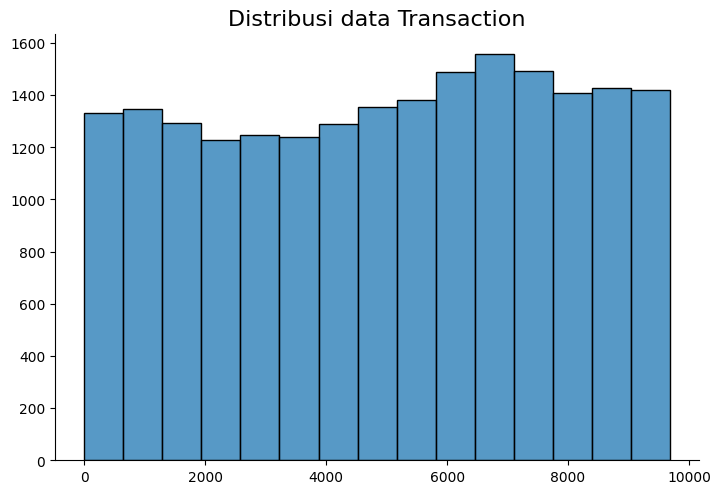

In [ ]:
sns.displot(data = df, bins = 15, x = "Transaction", height = 5, aspect = 1.5)
plt.title("Distribusi data Transaction", size = 16)
plt.xlabel(""); plt.ylabel("")
plt.show()

Dari asumsi sebelumnya, benar bahwa distribusinya tidak skewed. Ternyata penyebab deviasi standarnya cenderung besar karena data Transaction memiliki distribusi uniform.

Untuk membantu proses Exploratory Data Analysis, alangkah baiknya untuk mengubah fitur date_time agar dapat menganalisa dinamika pembelian selama periode waktu yang berbeda, kita harus membagi kolom date_time menjadi waktu dan jam.

In [ ]:
df['time']=df['date_time'].dt.time
df['hour']=df['date_time'].dt.hour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Untuk menganalisis dinamika pembelian sepanjang tahun, kita harus menambahkan kolom dengan nomor bulan dan namanya.

In [ ]:
df['month'] = df['date_time'].dt.month
df['month name'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#Extract year, month, day ke dalam kolom baru
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Demikian pula, untuk menganalisis pembelian mingguan, kita perlu menyoroti hari-hari dalam seminggu dan namanya.

In [ ]:
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['weekday name'] = df['weekday'].replace([0,1,2,3,4,5,6],
 ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,Date,Time,time,hour,month,month name,Year,Month,day,weekday,weekday name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,09:58:00,9,10,October,2016,10,30,6,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10:05:00,10,10,October,2016,10,30,6,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10:05:00,10,10,October,2016,10,30,6,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10:07:00,10,10,October,2016,10,30,6,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10:07:00,10,10,October,2016,10,30,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,14:32:00,14:32:00,14,4,April,2017,4,9,6,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,14:32:00,14:32:00,14,4,April,2017,4,9,6,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,14:57:00,14:57:00,14,4,April,2017,4,9,6,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,14:57:00,14:57:00,14,4,April,2017,4,9,6,Sunday


Karena kolom datetime sudah dipecah, maka kolom date_time kita drop

In [ ]:
#Menghapus kolom 'date_time'
df.drop('date_time', axis=1, inplace=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,period_day,weekday_weekend,Date,Time,time,hour,month,month name,Year,Month,day,weekday,weekday name
0,1,Bread,morning,weekend,2016-10-30,09:58:00,09:58:00,9,10,October,2016,10,30,6,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10:05:00,10,10,October,2016,10,30,6,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10:05:00,10,10,October,2016,10,30,6,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,10:07:00,10,10,October,2016,10,30,6,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,10:07:00,10,10,October,2016,10,30,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-04-09,14:32:00,14:32:00,14,4,April,2017,4,9,6,Sunday
20503,9682,Tea,afternoon,weekend,2017-04-09,14:32:00,14:32:00,14,4,April,2017,4,9,6,Sunday
20504,9683,Coffee,afternoon,weekend,2017-04-09,14:57:00,14:57:00,14,4,April,2017,4,9,6,Sunday
20505,9683,Pastry,afternoon,weekend,2017-04-09,14:57:00,14:57:00,14,4,April,2017,4,9,6,Sunday


In [ ]:
#Cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   period_day       20507 non-null  object        
 3   weekday_weekend  20507 non-null  object        
 4   Date             20507 non-null  datetime64[ns]
 5   Time             20507 non-null  object        
 6   time             20507 non-null  object        
 7   hour             20507 non-null  int64         
 8   month            20507 non-null  int64         
 9   month name       20507 non-null  object        
 10  Year             20507 non-null  int64         
 11  Month            20507 non-null  int64         
 12  day              20507 non-null  int64         
 13  weekday          20507 non-null  int64         
 14  weekday name     20507 non-null  objec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Cek missing value
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction        0
Item               0
period_day         0
weekday_weekend    0
Date               0
Time               0
time               0
hour               0
month              0
month name         0
Year               0
Month              0
day                0
weekday            0
weekday name       0
dtype: int64

Tidak ada data yang missing setelah dilakukan transformasi kolom date_time

In [ ]:
# cek nilai "NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0 pada kolom Item
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("Tidak ada missing values dalam dataframe".format(len(df[df.Item.isin(missing_value)])))
df[df.Item.isin(missing_value)].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tidak ada missing values dalam dataframe


,Transaction,Item,period_day,weekday_weekend,Date,Time,time,hour,month,month name,Year,Month,day,weekday,weekday name


Dataset tidak memiliki nilai "NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0. Maka tidak perlu dilakukan handling missing values.

Selanjutnya dalam Data Preparation, akan dilakukan sedikit integrasi data, mengingat dataset ini sudah bersih dari invalid dan missing values.


Data Integration yang akan dilakukan adalah memastikan kolom `Item` bersih dari whitespaces, dan juga menormalisasi data dengan mengubah semua strings pada kolom `Item` menjadi lowercase.

In [ ]:
#Menerapkan pandas apply
df["Item"] = df["Item"].apply(lambda item: item.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Memastikan setiap nilai "Item" bersih dari whitespace
df["Item"] = df["Item"].apply(lambda item: item.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**4. Analisis Sederhana**

**Frekuensi Transaksi Item**

In [ ]:
#Frekuensi Transaksi Item
item_freq = df['Item'].value_counts()
print (item_freq)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


coffee            5471
bread             3325
tea               1435
cake              1025
pastry             856
                  ... 
bacon                1
gift voucher         1
olum & polenta       1
raw bars             1
polenta              1
Name: Item, Length: 94, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


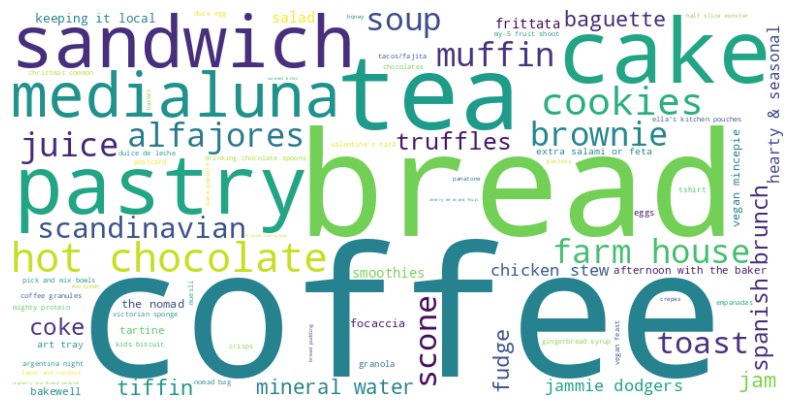

In [ ]:
#Visualisasi
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(item_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud dipilih karena jumlah item yang sangat banyak sehingga visualisasi menggunakan diagram menjadi bertumpuk antar nama item. Dapat dilihat bahwa coffe adalah item dengan transaksi terbanyak.

**Top 10 Item Dengan Transaksi Terbanyak**

In [ ]:
# 10 Item Dengan Transaksi Terbanyak
popular = df.groupby(by='Item')['Transaction'].count().sort_values(ascending=False).head(10)
print('Most Sold Items:')
print(most_sold)

Most Sold Items:
Item
coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
Name: Transaction, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Output tersebut menunjukkan daftar item dengan jumlah penjualan terbanyak (most sold items).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


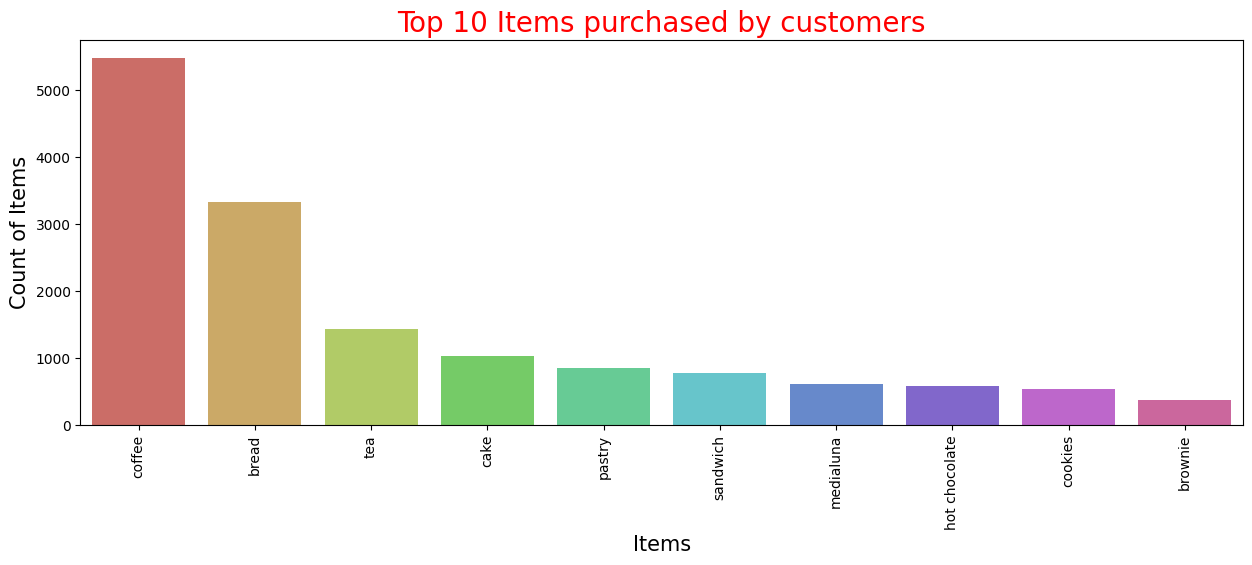

In [ ]:
#Visualisasi
plt.figure(figsize=(15,5)) #ukuran kanvas
sns.barplot(x = popular.head(10).index, y = popular.head(10).values, palette = 'hls') #bar plot
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90) #judul tick sumbu x
plt.ylabel('Count of Items', size = 15)
plt.title('Top 10 Items purchased by customers', color = 'red', size = 20) #judul visualisasi
plt.show()

**Total Transaksi Setiap Item**

In [ ]:
#Mengelompokkan data transaksi berdasarkan item & mengurutkan data berdasarkan transaksi dengan pola menurun
transaction = df.groupby(by= 'Item')[['Transaction']].count().sort_values(by= 'Transaction', ascending=False)

#Fungsi untuk mengubah ke persen
def convert_to_percentage(x):
  return 100 * x /float(x.sum())

#Menerapkan fungsi diatas
transaction_percentage = transaction.apply(convert_to_percentage)
transaction_percentage.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction
Item,
coffee,26.678695
bread,16.213976
tea,6.997611
cake,4.998293
pastry,4.174184


Output tersebut memberikan persentase penjualan untuk setiap item, yang diurutkan berdasarkan jumlah transaksi dengan pola menurun.

**Total Transaksi Tiap Bulan**

In [ ]:
#Transaksi dalam periode tertentu
monthly_sales = df.groupby('month name')['Transaction'].count()
sorted = monthly_sales.sort_values(ascending=False)
print(sorted)

month name
November    4436
March       3944
February    3906
January     3356
December    3339
April       1157
October      369
Name: Transaction, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


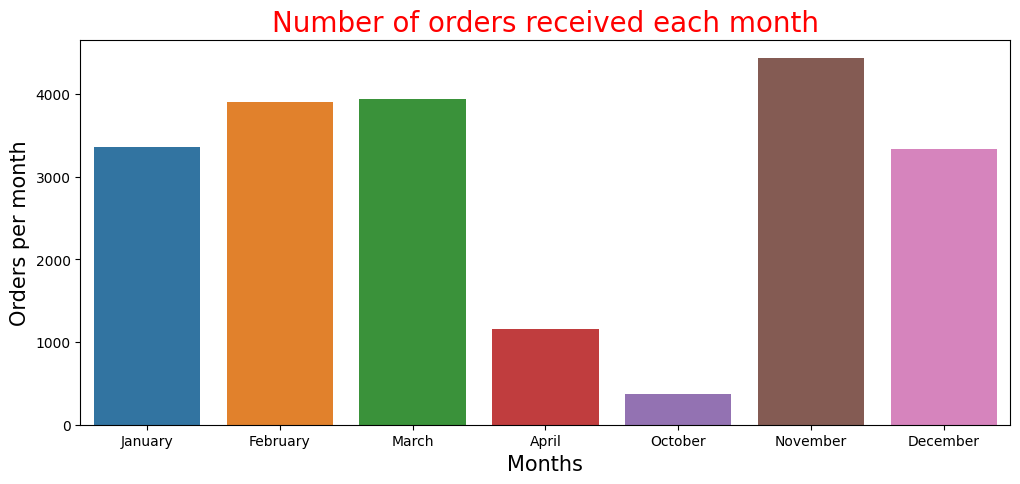

In [ ]:
# visualisasi
monthTran = df.groupby(['month','month name'])['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran[['month name', 'Transaction']], x = "month name", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'red', size = 20)
plt.show()

Jumlah transaksi berdasarkan bulan November adalah bulan paling banyak dilakukan transaksi.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


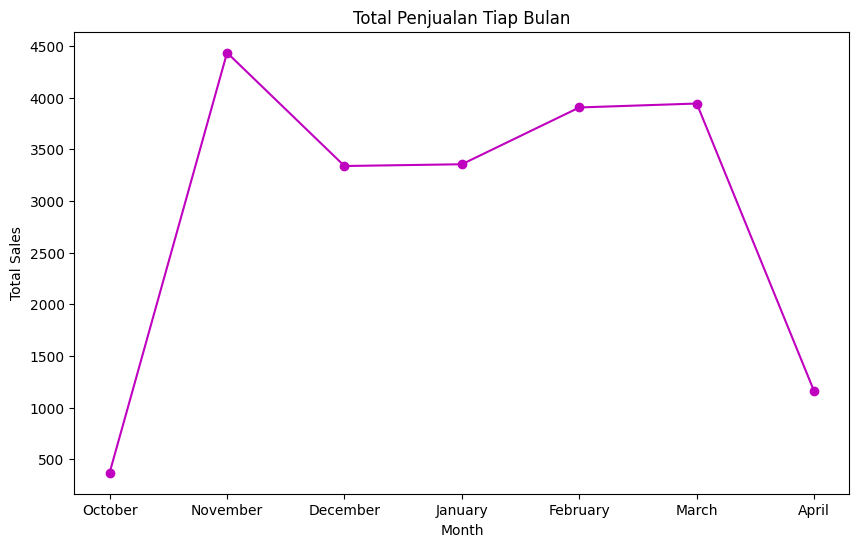

In [ ]:
#Calendar digunakan agar bulan yang ditampilkan sesuai urutan pada dataset
import calendar
#Urutkan bulan sesuai dengan urutan kalender
month_order = list(calendar.month_name)[10:] + list(calendar.month_name)[1:10]

monthly_sales = df.groupby('month name')['Transaction'].count().reindex(month_order).reset_index(name='Total Sales')
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month name'], monthly_sales['Total Sales'], marker='o', linestyle='-', color='m')
plt.title('Total Penjualan Tiap Bulan')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10 ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini
dibandingkan dengan yang lain.

In [ ]:
print (df.groupby('Month')['Date'].nunique())

Month
1     30
2     28
3     31
4      9
10     2
11    30
12    29
Name: Date, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dalam periode bulan 4 hanya tercatat 9 hari dan pada bulan 10 hanya tercatat 2 hari.

Kami memutuskan tidak menghapus data bulan 4 dan bulan 10 untuk dijadikan mencari alternatif atau solusi optimalisasi penjualan pada bulan tersebut.

**Analisis persentase pembelian pada akhir pekan dan hari kerja**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


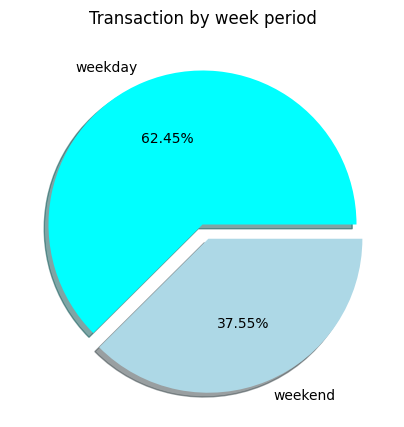

In [ ]:
size = df['weekday_weekend'].value_counts()
labels = size.index.values
colors = ["cyan", "lightblue"]
explode = [0, 0.1]

plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Transaction by week period')
plt.show()

Anda bisa melihat bahwa 62% pembelian dilakukan pada hari kerja dan 37% dilakukan pada akhir pekan.

**Analisis aktivitas transaksi pembelian per hari**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


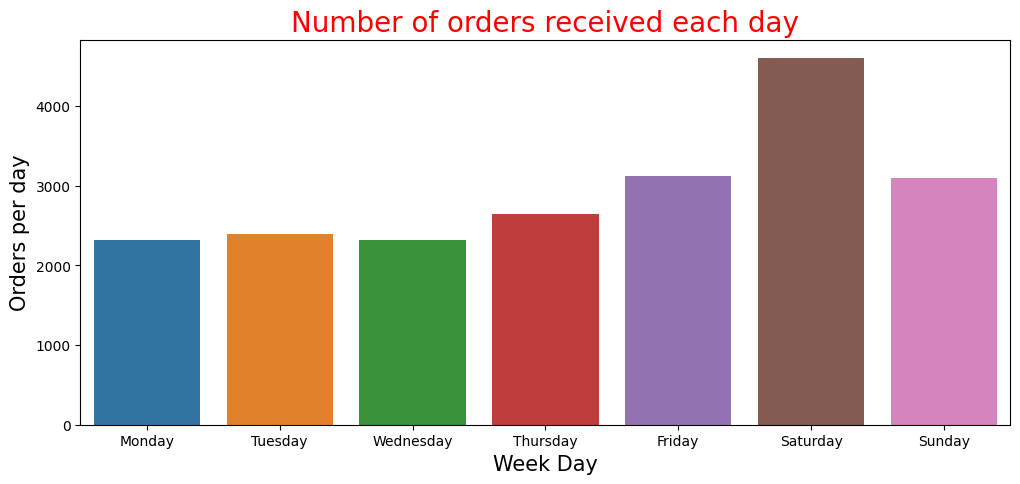

In [ ]:
weekTran = df.groupby(['weekday','weekday name'])['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran[['weekday name', 'Transaction']], x = "weekday name", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'red', size = 20)
plt.show()

Seperti yang bisa Anda lihat dari plot, pembeli aktif sepanjang minggu. Tidak ada hari tanpa pembelian. Anda bisa melihat bahwa jumlah pembelian maksimum terjadi pada hari Sabtu.

**Frekuensi Pembelian Item Dalam Periode Hari**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


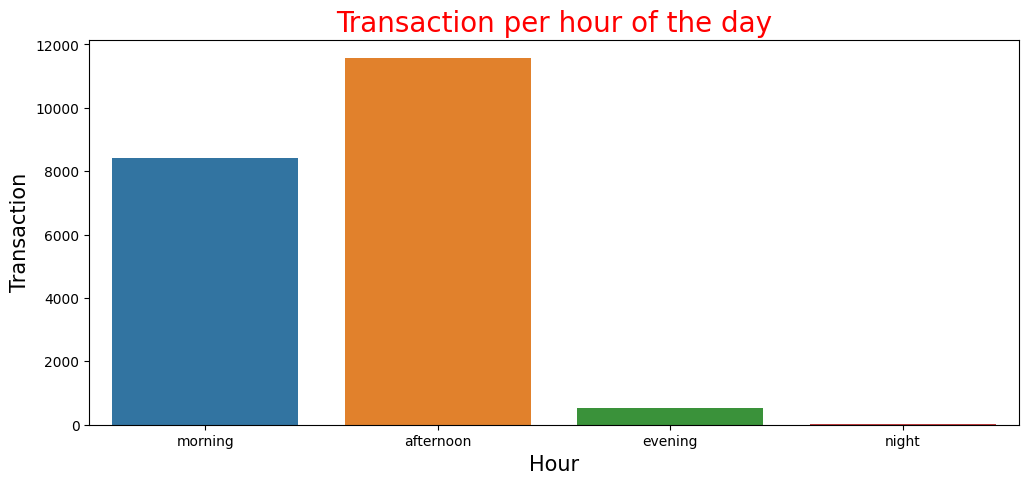

In [ ]:
# Visualiasi transaksi berdasarkan periode hari
coutbyweekday= df.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.loc[:,"dayorder"] = [1, 2, 0, 3]
coutbyweekday.sort_values("dayorder",inplace=True)
plt.figure(figsize=(12,5))
sns.barplot(data=coutbyweekday, x='period_day', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

Dari grafik tersebut terlihat bahwa pembeli melakukan transaksi paling banyak pada sore hari.

**Analisis Top 10 berdasarkan Periode Hari**

In [ ]:
#Hitung frekuensi pembelian untuk setiap item pada setiap periode hari
purchase_frequency = df.groupby(['Item', 'period_day']).size().reset_index(name='Purchase Frequency')

#Ambil 10 teratas
top_10_purchase = purchase_frequency.sort_values(by='Purchase Frequency', ascending=False).head(10)

#Tampilkan hasil 10 teratas
print("Top 10 Purchase Frequency:")
print(top_10_purchase)
top_10_purchase.to_csv ('Frekuensi Transansaksi PeriodDay', index=False)

Top 10 Purchase Frequency:
          Item period_day  Purchase Frequency
48      coffee  afternoon                2823
50      coffee    morning                2561
22       bread  afternoon                1661
24       bread    morning                1610
194        tea  afternoon                 930
31        cake  afternoon                 731
169   sandwich  afternoon                 671
158     pastry    morning                 604
196        tea    morning                 456
131  medialuna    morning                 402


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


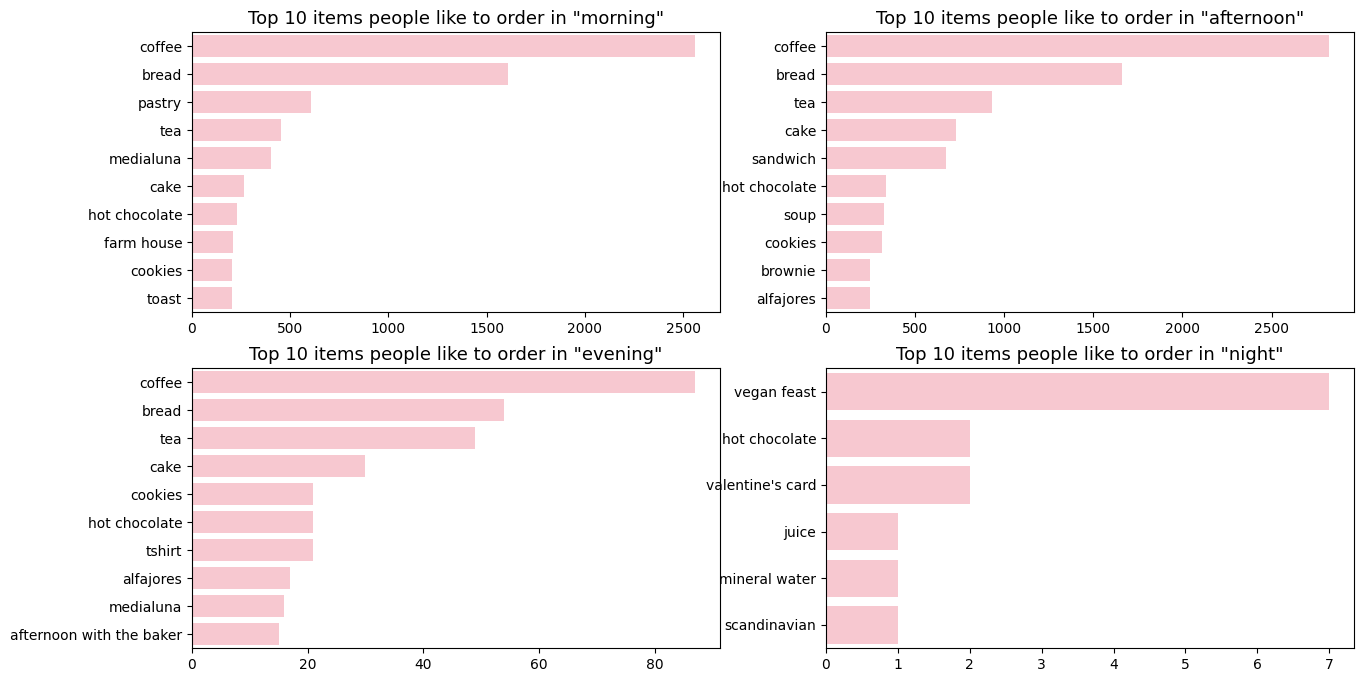

In [ ]:
# visualisasi
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

Dari visualisasi diatas kita bisa melihat bahwa penjualan coffee sangat populer pada saat morning,afternoon and evening.

**Total Transaksi Masing Masing Jam**

In [ ]:
#Waktu dilakukan transaksi terbanyak
time_freq = df['hour'].value_counts()
print (time_freq)

11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      48
7       24
20      22
22       8
21       3
23       3
1        1
Name: hour, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah transaksi yang terjadi pada jam tertentu. Misal "Jam 11 (11:00) memiliki frekuensi transaksi tertinggi sebanyak 3102 transaksi"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


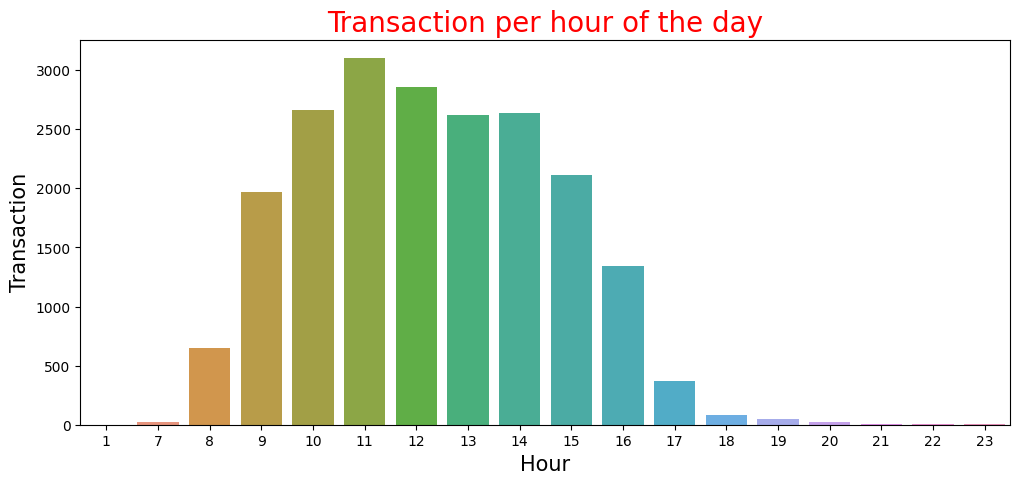

In [ ]:
# Visualisasi Transaksi berdasarkan jam
coutbyhour= df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=coutbyhour, x='hour', y='Transaction')
plt.xlabel('Hour', size = 15)
plt.ylabel('Transaction', size = 15)
plt.title('Transaction per hour of the day', color = 'red', size = 20)
plt.show()

Terlihat jelas bahwa konsumen melakukan transaksi mulai dari jam 9 pagi hingga jam 4 sore.

#**5. Data Modeling**

#Apriori

In [ ]:
#Menggunakan loop untuk membuat list transaksi dalam dataset
transaction_list = []

for i in df['Transaction']:
    tlist = list(set(df[df['Transaction'] == i]['Item']))
    if len(tlist) > 0:
        transaction_list.append(tlist)

#Menampilkan jumlah transaksi
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20507


In [ ]:
#Menerapkan transaction encorder
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 =pd.DataFrame(te_ary, columns=te.columns_)
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import time
start_time = time.time()

#Library Apriori
from mlxtend.frequent_patterns import association_rules, apriori

#Menerapkan apriori
apriori = apriori(df2, min_support=0.01, use_colnames=True)

#Aturan asosiasi dengan metriks lift
rules = association_rules(apriori, metric='lift', min_threshold=1.0)

metrix = pd.DataFrame(rules)
result = metrix[['antecedents', 'consequents', 'support','confidence',
                 'lift', 'leverage', 'conviction',]].sort_values('lift', ascending=False)

#Menyimpan hasil ke file CSV
result.to_csv('Aturan_Apriori.csv', index=False)

#Styling Output Agar Rapih
styled_result = result.style.format({
    'confidence': '{:.2%}',
    'lift': '{:.2f}',
    'leverage': '{:.2f}',
    'conviction': '{:.2f}',
})
display (styled_result)


end_time = time.time()
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time} detik")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
46,frozenset({'juice'}),frozenset({'cookies'}),0.013898,19.99%,2.41,0.01,1.15
47,frozenset({'cookies'}),frozenset({'juice'}),0.013898,16.75%,2.41,0.01,1.12
60,frozenset({'sandwich'}),frozenset({'soup'}),0.011021,10.10%,1.98,0.01,1.06
61,frozenset({'soup'}),frozenset({'sandwich'}),0.011021,21.59%,1.98,0.01,1.14
53,frozenset({'juice'}),frozenset({'sandwich'}),0.013313,19.14%,1.75,0.01,1.10
52,frozenset({'sandwich'}),frozenset({'juice'}),0.013313,12.20%,1.75,0.01,1.06
44,frozenset({'hot chocolate'}),frozenset({'cookies'}),0.012874,14.50%,1.75,0.01,1.07
45,frozenset({'cookies'}),frozenset({'hot chocolate'}),0.012874,15.52%,1.75,0.01,1.08
67,frozenset({'tea'}),frozenset({'soup'}),0.016531,8.61%,1.69,0.01,1.04
66,frozenset({'soup'}),frozenset({'tea'}),0.016531,32.38%,1.69,0.01,1.19


Waktu eksekusi: 0.2650740146636963 detik


**Apriori menghasilkan 102 aturan**

- antecedents:

Merepresentasikan item sebelum aturan asosiasi (sebab).
- consequents:

Merepresentasikan item setelah aturan asosiasi (akibat).
- Support:

Aturan dengan dukungan tinggi dapat dianggap relevan karena muncul pada sejumlah besar transaksi.
- Confidence:

Aturan dengan confidence tinggi menunjukkan bahwa jika item A muncul, kemungkinan besar item B juga akan muncul.
- Lift:

Digunakan untuk menentukan seberapa baik suatu aturan dibandingkan dengan asumsi acak. Lift lebih dari 1 menunjukkan bahwa aturan tersebut lebih baik daripada asumsi acak.
- Leverage:

Mengukur seberapa banyak dukungan tambahan.
- Conviction:

Mengukur seberapa besar aturan tersebut bergantung pada item "antecedents". Nilai conviction lebih dari 1 menunjukkan kekuatan aturan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


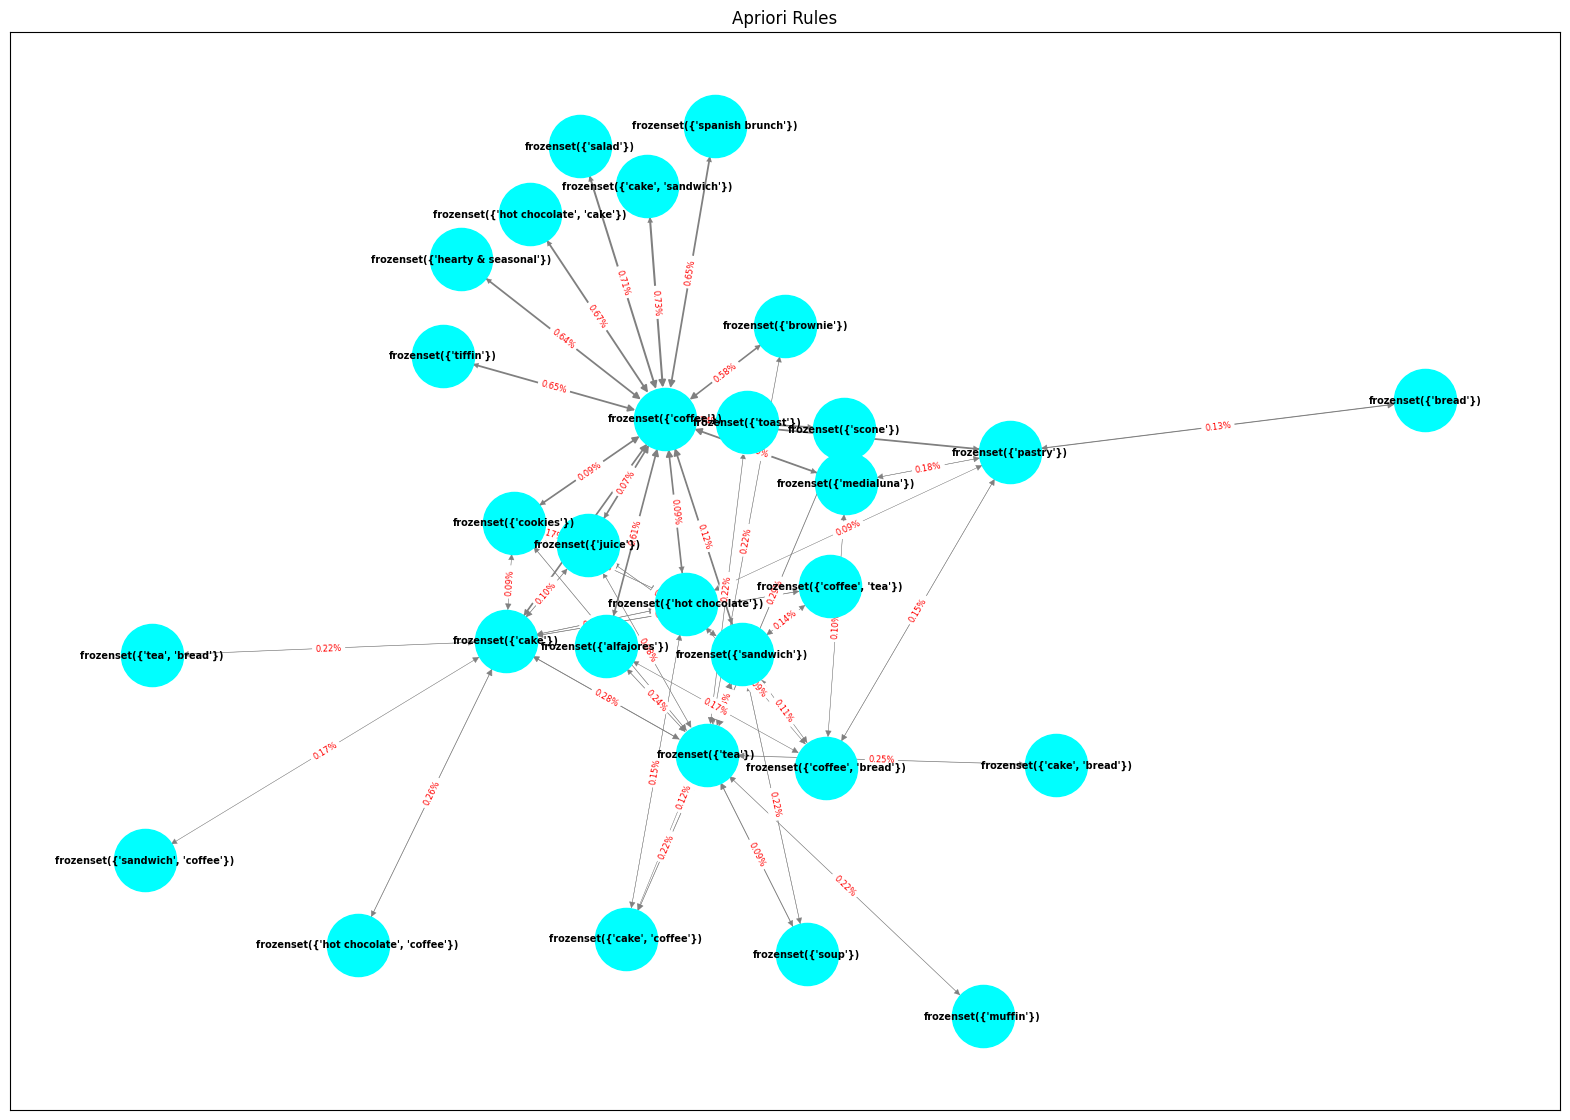

In [ ]:
#Library untuk membuat diagram Netwotk
import networkx as nx

rules = pd.read_csv('Aturan_Apriori.csv')

#Buat graph dari aturan asosiasi
G = nx.DiGraph()
for i, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['confidence'])

#Posisi node
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(20, 14))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='cyan',
                 font_size=7, font_color='black', font_weight='bold', edge_color='gray',
                 width=[d['weight']*2 for u, v, d in G.edges(data=True)])

#Label edge(persentasi nilai confidence)
edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

#Tampilkan plot
plt.title('Apriori Rules')
plt.show()

Output dari network diagram atau grafik jaringan yang dihasilkan dari aturan asosiasi (apriori) mencerminkan hubungan antara item atau kelompok item dalam dataset. Setiap simpul (node) dalam diagram mewakili sebuah item atau kelompok item, dan setiap tepi (edge) menghubungkan antara item-item yang memiliki hubungan dalam aturan asosiasi. Network Diagram Apriori memiliki 29 node.

#FP-Growth

In [ ]:
#Library FP-Growth
from mlxtend.frequent_patterns import fpgrowth, association_rules

#Menerapkan Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(df.groupby('Transaction')['Item'].apply(list)).transform(df.groupby('Transaction')['Item'].apply(list))
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time
start_time = time.time()

#Menerapkan FP-Growth pada DataFrame yang sudah diencode
fpgrowth_result = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Menghasilkan aturan asosiasi dengan metriks lift
rules_fp = association_rules(fpgrowth_result, metric='lift', min_threshold=1.0)
rules_fp['support'] = rules_fp['support']
rules_fp['leverage'] = rules_fp['leverage']
rules_fp['conviction'] = rules_fp['conviction']

#Menampilkan hasil diurutkan berdasarkan nilai lift
hasil = rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift',
                  'leverage', 'conviction']].sort_values('lift', ascending=False)

#Menyimpan hasil ke file CSV
hasil.to_csv('Aturan_FPGrowth.csv', index=False)

#Styling Output Agar Rapih
result = result.style.format({
    'confidence': '{:.2%}',
    'lift': '{:.2f}',
    'leverage': '{:.2f}',
    'conviction': '{:.2f}',
})
display (result)

end_time = time.time()
execution_time = end_time - start_time
print(f"Waktu eksekusi: {execution_time} detik")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
46,frozenset({'juice'}),frozenset({'cookies'}),0.013898,19.99%,2.41,0.01,1.15
47,frozenset({'cookies'}),frozenset({'juice'}),0.013898,16.75%,2.41,0.01,1.12
60,frozenset({'sandwich'}),frozenset({'soup'}),0.011021,10.10%,1.98,0.01,1.06
61,frozenset({'soup'}),frozenset({'sandwich'}),0.011021,21.59%,1.98,0.01,1.14
53,frozenset({'juice'}),frozenset({'sandwich'}),0.013313,19.14%,1.75,0.01,1.10
52,frozenset({'sandwich'}),frozenset({'juice'}),0.013313,12.20%,1.75,0.01,1.06
44,frozenset({'hot chocolate'}),frozenset({'cookies'}),0.012874,14.50%,1.75,0.01,1.07
45,frozenset({'cookies'}),frozenset({'hot chocolate'}),0.012874,15.52%,1.75,0.01,1.08
67,frozenset({'tea'}),frozenset({'soup'}),0.016531,8.61%,1.69,0.01,1.04
66,frozenset({'soup'}),frozenset({'tea'}),0.016531,32.38%,1.69,0.01,1.19


Waktu eksekusi: 0.09446430206298828 detik


**FP-Growth menghasilkan 42 aturan**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


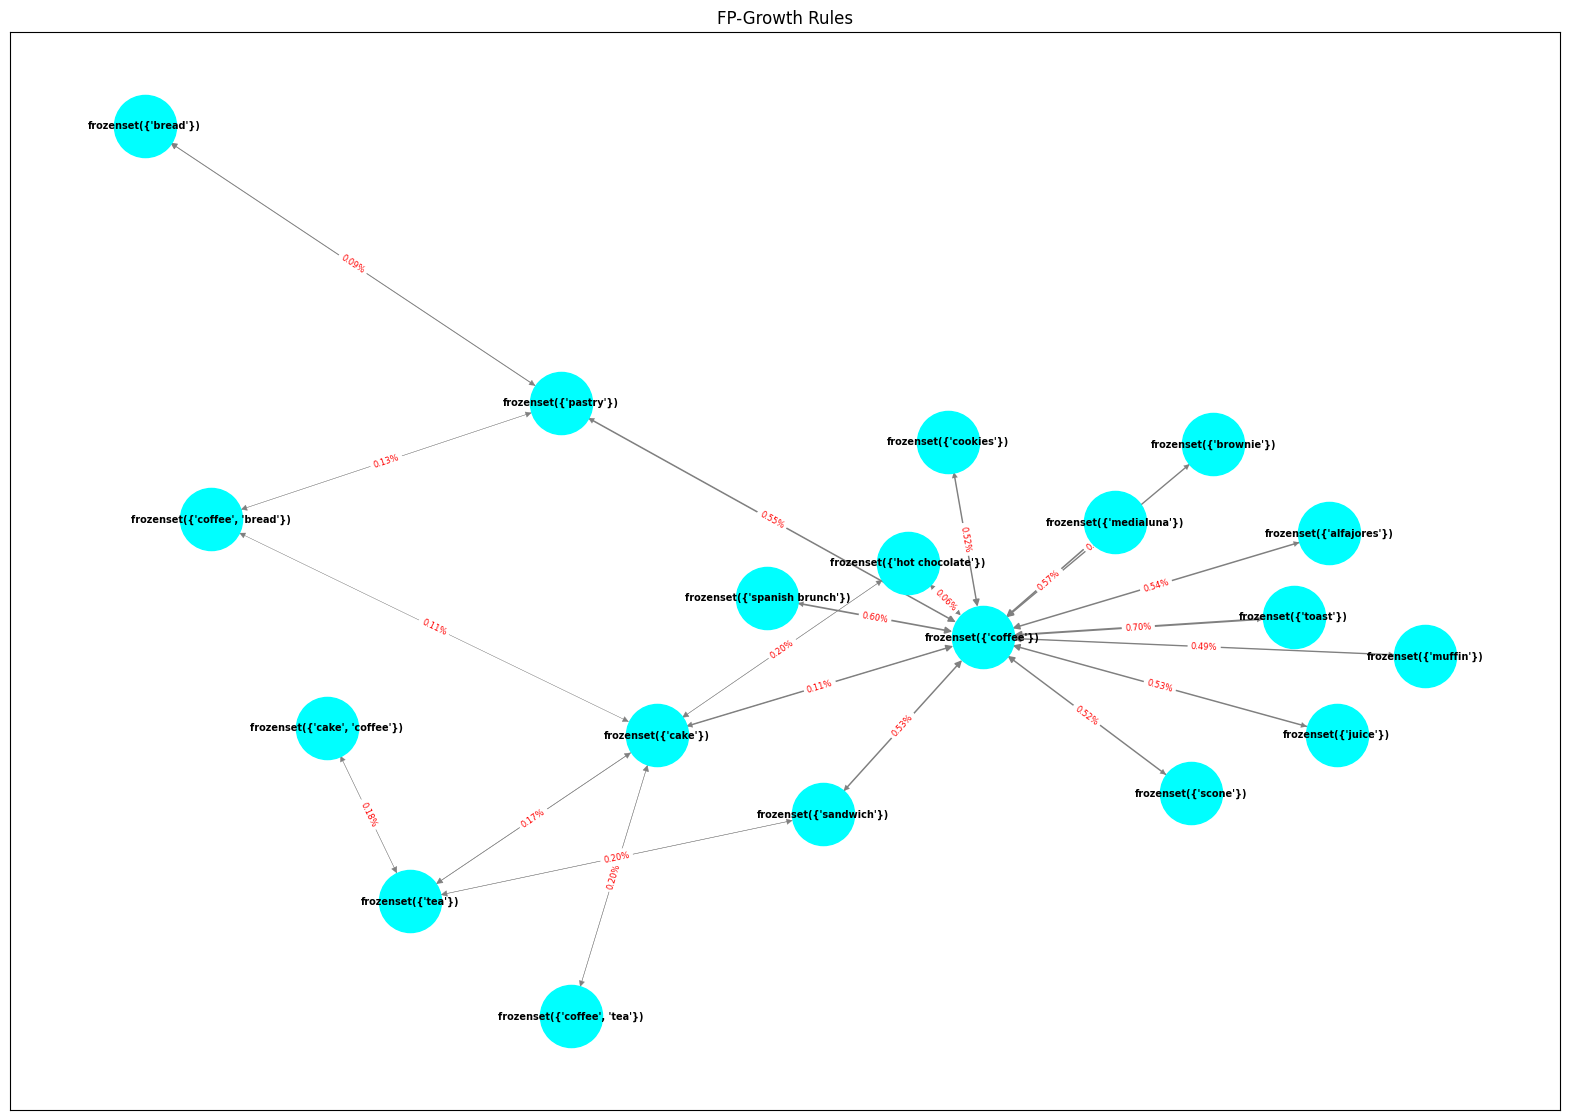

In [ ]:
rules = pd.read_csv('Aturan_FPGrowth.csv')

#Buat graph dari aturan asosiasi
G = nx.DiGraph()
for i, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['confidence'])

#Atur posisi node
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(20, 14))
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='cyan',
                 font_size=7, font_color='black', font_weight='bold', edge_color='gray',
                 width=[d['weight']*2 for u, v, d in G.edges(data=True)])

#Label edge (Persentasi nilai confidence)
edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

#Tampilkan plot
plt.title('FP-Growth Rules')
plt.show()

Output dari network diagram atau grafik jaringan yang dihasilkan dari aturan asosiasi (FP-Growth) mencerminkan hubungan antara item atau kelompok item dalam dataset. Setiap simpul (node) dalam diagram mewakili sebuah item atau kelompok item, dan setiap tepi (edge) menghubungkan antara item-item yang memiliki hubungan dalam aturan asosiasi. Diagram Network FP-Growth memiliki 19 node.